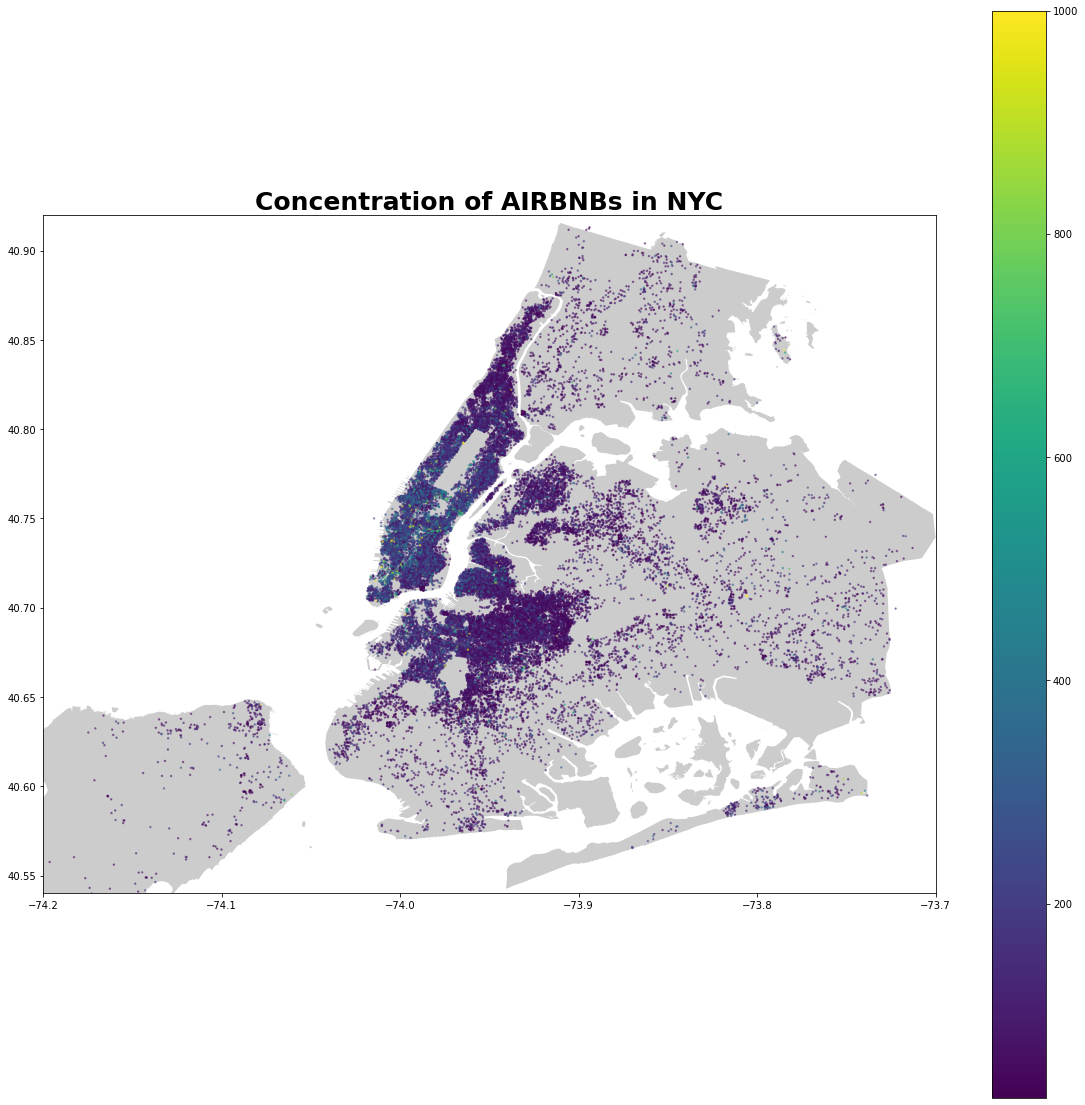

In [49]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

df = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
 (df['price'] <= np.percentile(df['price'], 99.5))]

street_map = gpd.read_file('../input/boroughs-map')

crs = {'init':'espc:4326'}
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df,crs = crs,geometry = geometry)

fig, ax = plt.subplots(figsize=(20,20))
street_map.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(column='price',ax=ax,alpha=0.5, legend=True,legend_kwds={'shrink': 0.3},markersize=2)
plt.title('Concentration of AIRBNBs in NYC', fontsize=25,fontweight='bold')
plt.xlim(-74.2,-73.7)
plt.ylim( 40.54,40.92)

plt.show()